In [0]:
import matplotlib.pyplot as plt

from keras.datasets import  mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

import numpy as np 
from sklearn.metrics import confusion_matrix

In [0]:
#divisao das bases de dados
(X_treino, y_treino,), (X_teste, y_teste) = mnist.load_data()

Text(0.5, 1.0, '4')

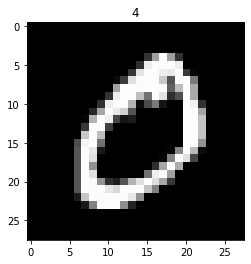

In [26]:
#visualiza a imagem, passando o indicie
#cmap='gray' mostra a imagem em cinza
plt.imshow(X_treino[1], cmap='gray')
cmap='gray'
plt.title(y_treino[2])

#observe que no acima da imagem, mostra o valor real da imagem "4"

In [0]:
#fazendo tratamento reshape
X_treino = X_treino.reshape((len(X_treino), np.prod(X_treino.shape[1:])))

X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))


In [0]:
#convertando os valores para float
X_treino = X_treino.astype('float32')
X_teste = X_teste.astype('float32')

In [0]:
#Normalizando os valores entre 0 e 1 

X_treino /=255
X_teste /=255

In [0]:
#10 numero de classes na base
#Informa que a camada de saida, tera 10 neuronios, por conta da quantidade de classe
y_treino = np_utils.to_categorical(y_treino, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

In [32]:
#Sequential = trabalha com uma sequencia de camdas
modelo = Sequential()

#units = quantidade de neuronios da nossa camada escondida (primeira camada)
#activation = funcao de ativacao usamos relu
#input_dim= 784 faz o numero de referencia de caracteristicas na base de dados, e que nesse caso e 784
modelo.add(Dense(units=64, activation='relu', input_dim= 784))

'''Dropout() ajustar os valores passado pela camada, usado quando ha muitas 
características ou neu na base, nesse caso zerando alguns neuronios para não ter Overfitting, para
proxima camada'''
#Com Dropout(0.2), estamos dizendo que vamos zerar 20% dos 64 neuronios
modelo.add(Dropout(0.2))


modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))

modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))

#camada de saida
modelo.add(Dense(units=10, activation='softmax'))



modelo.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [39]:
#compilando (fazendo ajuste dos pesos) a rede
#optimizer= 'adam' 
#loos= 'categorical_crossentropy' para problemas de classificacao com mais de duas classes
#loos funcao para otimizar erro
modelo.compile(optimizer= 'adam', loss= 'categorical_crossentropy',
               metrics = ['accuracy'])

#fazendo treinamento
#visualize o valor "val_acc" para ter a acuracia
historico = modelo.fit(X_treino, y_treino, epochs=20,
                       validation_data = (X_teste, y_teste))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 7s 113us/step - loss: 0.4431 - acc: 0.8633 - val_loss: 0.1667 - val_acc: 0.9473
Epoch 2/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2283 - acc: 0.9339 - val_loss: 0.1316 - val_acc: 0.9602
Epoch 3/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.1861 - acc: 0.9458 - val_loss: 0.1123 - val_acc: 0.9653
Epoch 4/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.1621 - acc: 0.9529 - val_loss: 0.1160 - val_acc: 0.9644
Epoch 5/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.1488 - acc: 0.9567 - val_loss: 0.0971 - val_acc: 0.9712
Epoch 6/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.1382 - acc: 0.9597 - val_loss: 0.0983 - val_acc: 0.9703
Epoch 7/20
60000/60000 [=

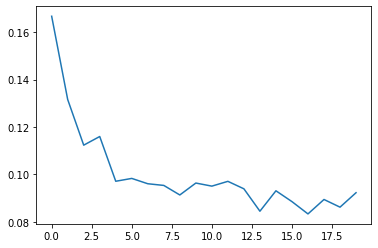

In [42]:
historico.history.keys()
#aqui podemos visulizar o erro
plt.plot(historico.history['val_loss'])

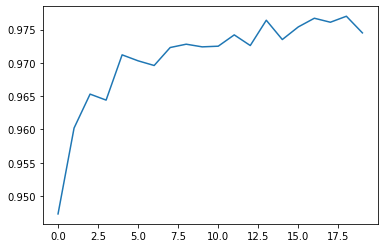

In [43]:
#aqui podemos visulizar o acerto
plt.plot(historico.history['val_acc'])

In [46]:
#fazendo as previsoes
previsoes = modelo.predict(X_teste)

previsoes

array([[2.80274571e-11, 4.66489902e-10, 2.66826447e-07, ...,
        9.99997854e-01, 1.47955693e-11, 1.23538484e-06],
       [1.16682801e-11, 1.40167351e-04, 9.99856472e-01, ...,
        3.11104912e-07, 2.66833083e-10, 1.77695925e-14],
       [1.19318520e-12, 9.99994755e-01, 3.36998227e-07, ...,
        4.57484788e-07, 1.66440293e-06, 1.19037058e-09],
       ...,
       [3.69600482e-13, 9.00105235e-09, 9.26757782e-09, ...,
        4.21108162e-08, 3.86358900e-09, 7.26810049e-06],
       [1.64112231e-15, 2.57570967e-15, 7.42504338e-14, ...,
        1.06168058e-14, 3.27891470e-09, 1.91005406e-10],
       [1.73005582e-10, 3.97255098e-14, 2.90789857e-11, ...,
        1.25306645e-15, 1.03308456e-11, 8.52743169e-14]], dtype=float32)

In [0]:
#vamos pegar os maiores valores
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]

In [50]:
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 972,    1,    1,    0,    1,    0,    1,    0,    3,    1],
       [   0, 1124,    1,    2,    0,    1,    2,    1,    4,    0],
       [   5,    1,  998,   11,    3,    0,    1,   10,    3,    0],
       [   0,    0,    4,  986,    0,    7,    0,    9,    2,    2],
       [   0,    0,    6,    0,  965,    0,    1,    1,    1,    8],
       [   3,    1,    0,   10,    4,  859,    3,    1,    4,    7],
       [   3,    2,    1,    1,    7,    3,  939,    0,    2,    0],
       [   2,    3,    9,    2,    2,    0,    0, 1005,    0,    5],
       [   3,    2,    6,    5,    5,    7,    4,    3,  928,   11],
       [   3,    3,    2,    8,   17,    2,    0,    4,    1,  969]])

In [60]:
#fazendo teste

y_treino[20] #digito 4
novo = x_treino[20]

#temos antes que tratar
#tratamos para que novo(x_treino), tenha so uma coluna, para fazer a comparacao
novo = np.expand_dims(novo, axis = 0)

pred = modelo.predict(novo)

print(y_treino[20])
pred


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)